# Sales Analysis

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar

#### Merging 12 months of Sales Data into a single file

In [11]:
jan = pd.read_csv('../input/monthly-sales-data/Sales_April_2019.csv')
feb = pd.read_csv('../input/monthly-sales-data/Sales_February_2019.csv')
mar = pd.read_csv('../input/monthly-sales-data/Sales_March_2019.csv')
apr = pd.read_csv('../input/monthly-sales-data/Sales_April_2019.csv')
may = pd.read_csv('../input/monthly-sales-data/Sales_May_2019.csv')
jun = pd.read_csv('../input/monthly-sales-data/Sales_June_2019.csv')
jul = pd.read_csv('../input/monthly-sales-data/Sales_July_2019.csv')
aug = pd.read_csv('../input/monthly-sales-data/Sales_August_2019.csv')
sep = pd.read_csv('../input/monthly-sales-data/Sales_September_2019.csv')
oct = pd.read_csv('../input/monthly-sales-data/Sales_October_2019.csv')
nov = pd.read_csv('../input/monthly-sales-data/Sales_November_2019.csv')
dec = pd.read_csv('../input/monthly-sales-data/Sales_December_2019.csv')
jan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [12]:
sales=pd.concat([jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec])
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Clean up the Data

In [13]:
sales.isnull().sum()

Order ID            578
Product             578
Quantity Ordered    578
Price Each          578
Order Date          578
Purchase Address    578
dtype: int64

In [14]:
sales.dropna(subset = ['Order ID'], inplace=True)

In [15]:
sales.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Question 1: What was the best month for sales and how much money was earned in that month?

In [16]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194932 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          194932 non-null  object
 1   Product           194932 non-null  object
 2   Quantity Ordered  194932 non-null  object
 3   Price Each        194932 non-null  object
 4   Order Date        194932 non-null  object
 5   Purchase Address  194932 non-null  object
dtypes: object(6)
memory usage: 10.4+ MB


In [17]:
# Adding a month column
sales['Month'] = sales['Order Date'].str[:2]
sales = sales.loc[sales['Month']!= 'Or'] # to overcome the error invalid literal for int() with base 10: 'Or'
sales['Month'] = sales['Month'].astype('int32')
sales['Month Name'] = sales['Month'].apply(lambda x: calendar.month_name[x])

In [18]:
# Convert column to correct type
sales['Price Each'] = sales['Price Each'].astype('float')
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194558 entries, 0 to 25116
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          194558 non-null  object 
 1   Product           194558 non-null  object 
 2   Quantity Ordered  194558 non-null  object 
 3   Price Each        194558 non-null  float64
 4   Order Date        194558 non-null  object 
 5   Purchase Address  194558 non-null  object 
 6   Month             194558 non-null  int32  
 7   Month Name        194558 non-null  object 
dtypes: float64(1), int32(1), object(6)
memory usage: 12.6+ MB


In [19]:
sales['Quantity Ordered'] = sales['Quantity Ordered'].astype('int32') #Convert column to correct type
sales['Total Sales'] = sales['Price Each']*sales['Quantity Ordered']
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Total Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,April,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,April,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,April,11.99


In [20]:
per_month = sales.groupby(['Month Name','Month'])
# Making a Dataframe with total sales per month
sales_per_month = per_month['Total Sales'].sum().reset_index()
sales_per_month.sort_values('Month', inplace=True)

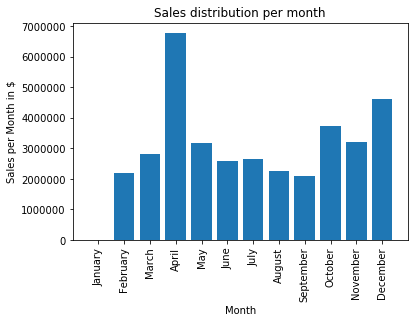

In [21]:
plt.figure(figsize=(6,4))
plt.bar(sales_per_month['Month Name'],sales_per_month['Total Sales'])
plt.xticks(rotation='vertical')
plt.xlabel('Month')
plt.ylabel('Sales per Month in $')
plt.title('Sales distribution per month')
plt.show()

#### As we can see, the highest sales was in December

### Question 2: Which city had highest sales?

In [22]:
# Extracting the City from the address
sales['Purchase Address'] = sales['Purchase Address'].str.split(',')
sales['City'] = sales['Purchase Address'].apply(lambda x: x[1])
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Total Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"[917 1st St, Dallas, TX 75001]",4,April,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"[682 Chestnut St, Boston, MA 02215]",4,April,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"[669 Spruce St, Los Angeles, CA 90001]",4,April,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"[669 Spruce St, Los Angeles, CA 90001]",4,April,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"[333 8th St, Los Angeles, CA 90001]",4,April,11.99,Los Angeles


In [23]:
# Putting the Address field to as it was before, see the difference in the values covered with [] 
sales['Purchase Address'] = sales['Purchase Address'].str.join(',')

In [24]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Total Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,April,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,April,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,April,11.99,Los Angeles


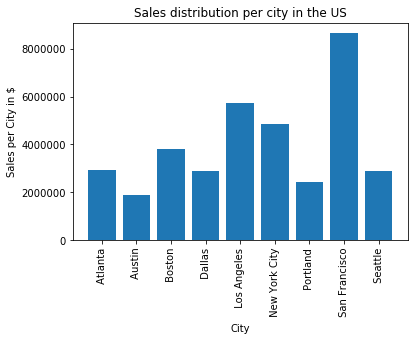

In [25]:
per_city = sales.groupby(['City'])
# Making a Dataframe with total sales per month
sales_per_city = per_city['Total Sales'].sum().reset_index()

plt.figure(figsize=(6,4))
plt.bar(sales_per_city['City'],sales_per_city['Total Sales'])
plt.xticks(rotation='vertical')
plt.xlabel('City')
plt.ylabel('Sales per City in $')
plt.title('Sales distribution per city in the US')
plt.show()

### As we can see, San Francisco has the highest Sales

### Question 3: What time should we display advertisements to maximize the likelihood of customers buying

In [26]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Total Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,April,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,April,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,April,11.99,Los Angeles


We can use the Order Time to see during what time of the day, there are higher number of orders

In [27]:
#Converting Order Date Column from String to Date-time data type
sales['Order Date'] = pd.to_datetime(sales['Order Date'])

In [28]:
sales.info()   #Notice the change in Order Date type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194558 entries, 0 to 25116
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          194558 non-null  object        
 1   Product           194558 non-null  object        
 2   Quantity Ordered  194558 non-null  int32         
 3   Price Each        194558 non-null  float64       
 4   Order Date        194558 non-null  datetime64[ns]
 5   Purchase Address  194558 non-null  object        
 6   Month             194558 non-null  int32         
 7   Month Name        194558 non-null  object        
 8   Total Sales       194558 non-null  float64       
 9   City              194558 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(5)
memory usage: 14.8+ MB


In [29]:
sales.head()   

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Total Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,April,11.99,Los Angeles


In [30]:
sales['Order Hour'] = sales['Order Date'].dt.hour
sales['Order Minute'] = sales['Order Date'].dt.minute
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Total Sales,City,Order Hour,Order Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April,23.90,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April,99.99,Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,April,11.99,Los Angeles,9,27


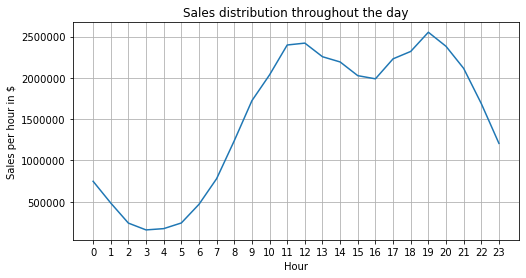

In [31]:
per_hour = sales.groupby(['Order Hour'])
# Making a Dataframe with total sales per month
sales_per_hour = per_hour['Total Sales'].sum().reset_index()

plt.figure(figsize=(8,4))
plt.plot(sales_per_hour['Order Hour'],sales_per_hour['Total Sales'])
plt.grid()
plt.xlabel('Hour')
plt.xticks(sales_per_hour['Order Hour'])
plt.ylabel('Sales per hour in $')
plt.title('Sales distribution throughout the day')
plt.show()

### So a good time to advertise would be at 10-11am and at 6-7pm

Do all the cities have similar trend?

In [32]:
per_hour_per_city = sales.groupby(['City','Order Hour'])
# Making a Dataframe with total sales per month
sales_per_hour = per_hour_per_city['Total Sales'].sum().reset_index()
sales_per_hour.head()

,City,Order Hour,Total Sales
0,Atlanta,0,67192.99
1,Atlanta,1,48522.64
2,Atlanta,2,25933.48
3,Atlanta,3,8042.42
4,Atlanta,4,20491.88


In [33]:
sales_per_hour['City'].unique()

array([' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles',
       ' New York City', ' Portland', ' San Francisco', ' Seattle'],
      dtype=object)

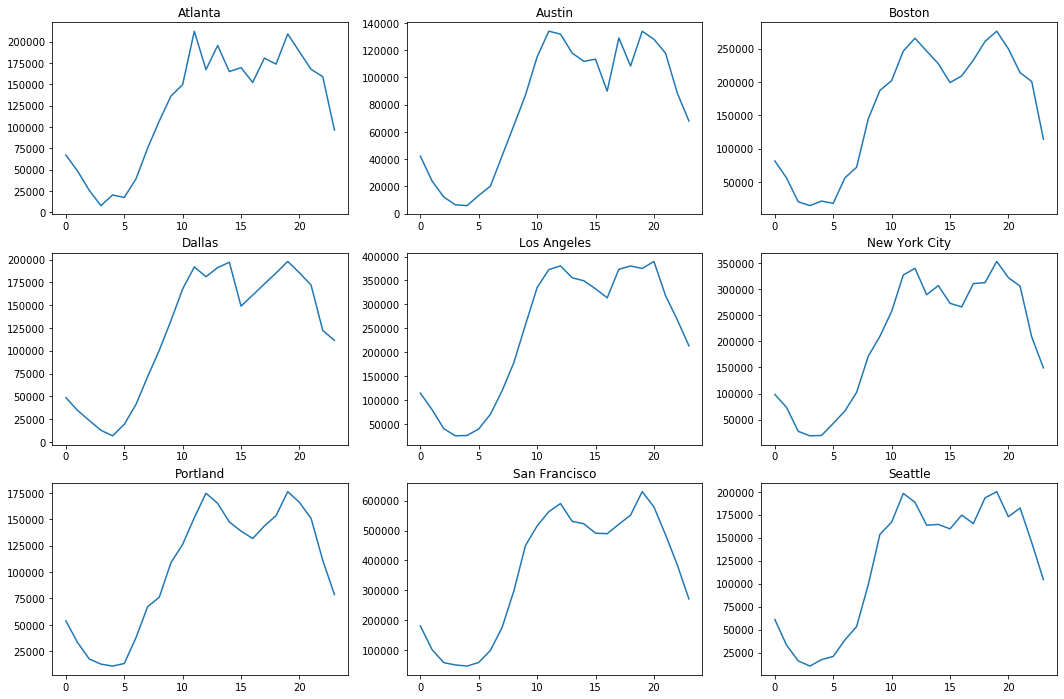

In [34]:
plt.figure(figsize=(18,12))

plt.subplot(331)
plt.title('Atlanta')
x= sales_per_hour['Order Hour'].loc[sales_per_hour['City']== ' Atlanta']
y= sales_per_hour['Total Sales'].loc[sales_per_hour['City']== ' Atlanta']
plt.plot(x,y)

plt.subplot(332)
plt.title('Austin')
x= sales_per_hour['Order Hour'].loc[sales_per_hour['City']== ' Austin']
y= sales_per_hour['Total Sales'].loc[sales_per_hour['City']== ' Austin']
plt.plot(x,y)

plt.subplot(333)
plt.title('Boston')
x= sales_per_hour['Order Hour'].loc[sales_per_hour['City']== ' Boston']
y= sales_per_hour['Total Sales'].loc[sales_per_hour['City']== ' Boston']
plt.plot(x,y)

plt.subplot(334)
plt.title('Dallas')
x= sales_per_hour['Order Hour'].loc[sales_per_hour['City']== ' Dallas']
y= sales_per_hour['Total Sales'].loc[sales_per_hour['City']== ' Dallas']
plt.plot(x,y)

plt.subplot(335)
plt.title('Los Angeles')
x= sales_per_hour['Order Hour'].loc[sales_per_hour['City']== ' Los Angeles']
y= sales_per_hour['Total Sales'].loc[sales_per_hour['City']== ' Los Angeles']
plt.plot(x,y)

plt.subplot(336)
plt.title('New York City')
x= sales_per_hour['Order Hour'].loc[sales_per_hour['City']== ' New York City']
y= sales_per_hour['Total Sales'].loc[sales_per_hour['City']== ' New York City']
plt.plot(x,y)

plt.subplot(337)
plt.title('Portland')
x= sales_per_hour['Order Hour'].loc[sales_per_hour['City']== ' Portland']
y= sales_per_hour['Total Sales'].loc[sales_per_hour['City']== ' Portland']
plt.plot(x,y)

plt.subplot(338)
plt.title('San Francisco')
x= sales_per_hour['Order Hour'].loc[sales_per_hour['City']== ' San Francisco']
y= sales_per_hour['Total Sales'].loc[sales_per_hour['City']== ' San Francisco']
plt.plot(x,y)

plt.subplot(339)
plt.title('Seattle')
x= sales_per_hour['Order Hour'].loc[sales_per_hour['City']== ' Seattle']
y= sales_per_hour['Total Sales'].loc[sales_per_hour['City']== ' Seattle']
plt.plot(x,y)
plt.show()

The trend of timing seems to exists across cities

### Question 3: What products are most often sold together?

In [35]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Total Sales,City,Order Hour,Order Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April,23.90,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April,99.99,Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,April,11.99,Los Angeles,9,27


In [36]:
df = sales[sales['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Total Sales,City,Order Hour,Order Minute,Grouped
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April,23.90,Dallas,8,46,"USB-C Charging Cable,USB-C Charging Cable"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April,99.99,Boston,22,30,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00,Los Angeles,14,38,"Google Phone,Wired Headphones,Google Phone,Wir..."
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99,Los Angeles,14,38,"Google Phone,Wired Headphones,Google Phone,Wir..."
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,April,11.99,Los Angeles,9,27,"Wired Headphones,Wired Headphones"


In [38]:
df = df[['Order ID','Grouped']].drop_duplicates()

In [39]:
df.head()

,Order ID,Grouped
0,176558,"USB-C Charging Cable,USB-C Charging Cable"
2,176559,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176560,"Google Phone,Wired Headphones,Google Phone,Wir..."
5,176561,"Wired Headphones,Wired Headphones"
6,176562,"USB-C Charging Cable,USB-C Charging Cable"


In [40]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('Lightning Charging Cable', 'Lightning Charging Cable') 2271
('USB-C Charging Cable', 'USB-C Charging Cable') 2136
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 2106
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 2049
('Wired Headphones', 'Wired Headphones') 1926
('Apple Airpods Headphones', 'Apple Airpods Headphones') 1544
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 1313
('iPhone', 'Lightning Charging Cable') 1157
('Google Phone', 'USB-C Charging Cable') 1137
('27in FHD Monitor', '27in FHD Monitor') 743


### So, as we can see 'iPhone' and 'Lightning Charging Cable' comination is sold together the most

## Question 4: What product is sold the most? And Why?

In [41]:
prod_group = sales.groupby('Product')

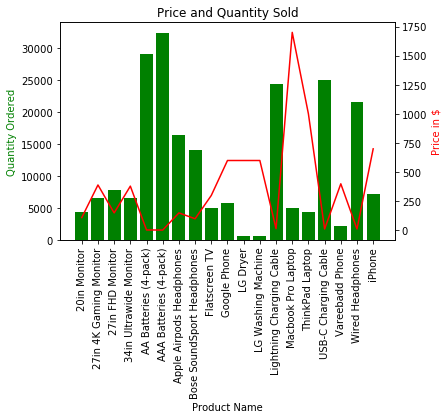

In [42]:
quantity_per_prod = prod_group['Quantity Ordered'].sum().reset_index()
price_per_prod = prod_group['Price Each'].mean().reset_index()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(quantity_per_prod['Product'],quantity_per_prod['Quantity Ordered'], color='green')
ax2.plot(price_per_prod['Product'],price_per_prod['Price Each'],'r-')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered',color='green')
ax2.set_ylabel('Price in $',color='red')
ax1.set_xticklabels(quantity_per_prod['Product'],rotation='vertical')
plt.title('Price and Quantity Sold')
plt.show()

As we can see that the cheaper items are sold more than the costlier items